Problem Statement: -

A logistics company recorded the time taken for delivery and the time taken for the sorting of the items for delivery. Build a Simple Linear Regression model to find the relationship between delivery time and sorting time with delivery time as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Understanding 

In [4]:
df=pd.read_csv("2delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.shape

(21, 2)

In [7]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [11]:
df.duplicated(['Delivery Time']).sum()

0

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [14]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Outliers Treatment

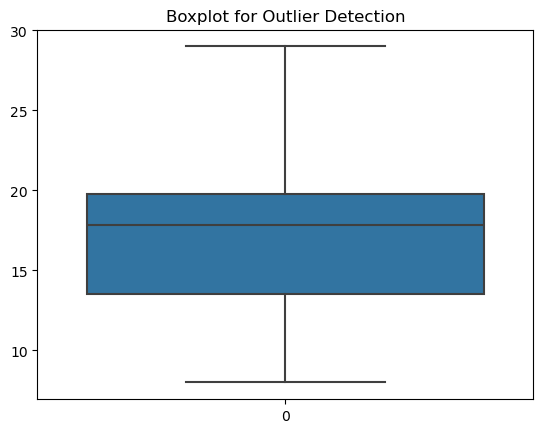

In [15]:
sns.boxplot(df['Delivery Time'])
plt.title("Boxplot for Outlier Detection")
plt.show()

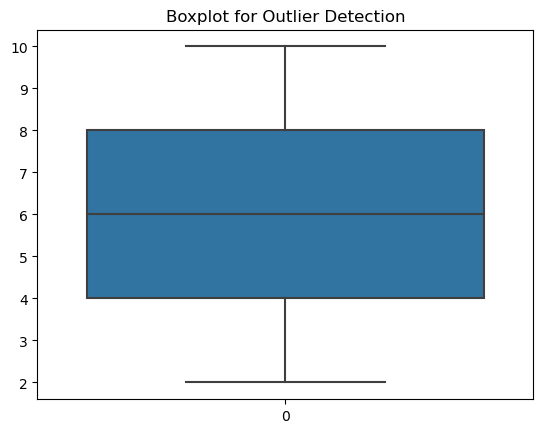

In [16]:
sns.boxplot(df['Sorting Time'])
plt.title("Boxplot for Outlier Detection")
plt.show()

#there are no outliers present here

4.Exploratory Data Analysis (EDA):
       4.1 Summary.
       4.2 Univariate analysis.
       4.3 Bivariate analysis.

In [17]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

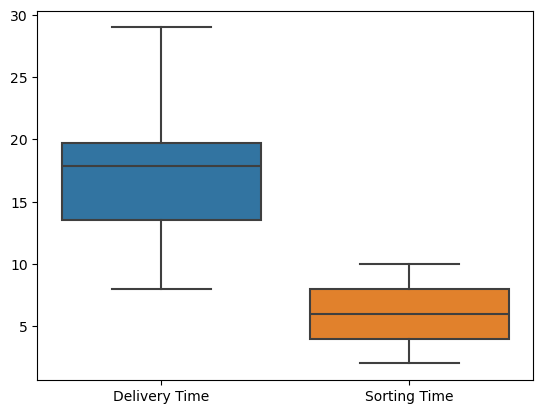

In [18]:
sns.boxplot(df)

In [19]:
#Univariate Analysis

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


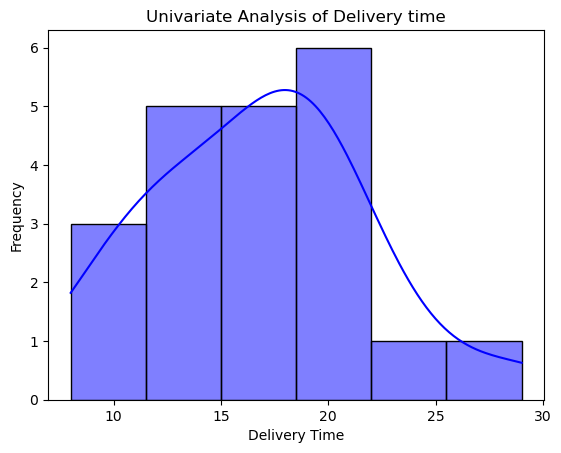

In [20]:
sns.histplot(df['Delivery Time'], kde=True, color='blue')
plt.title('Univariate Analysis of Delivery time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


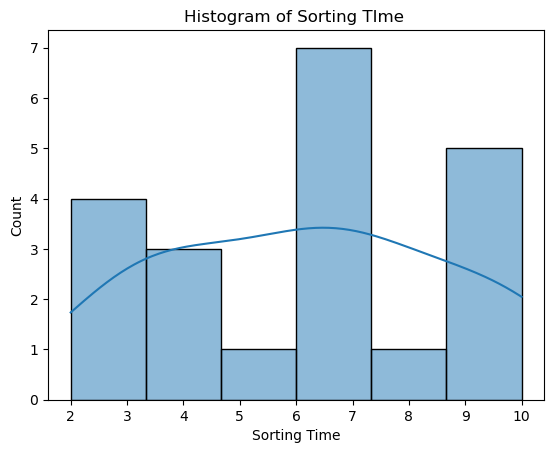

In [21]:
sns.histplot(df['Sorting Time'],kde=True)
plt.title('Histogram of Sorting TIme ')
plt.show()

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_13568\4132409294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Delivery Time', ylabel='Density'>

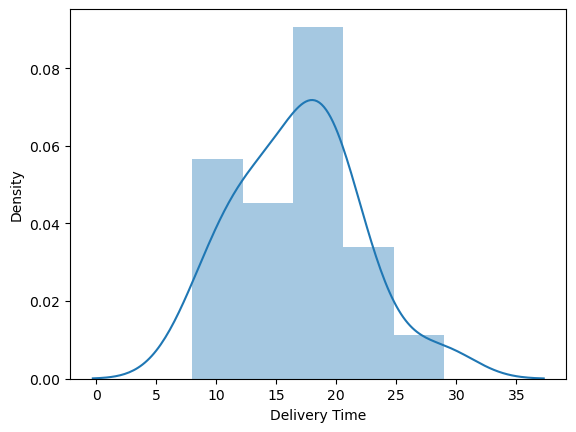

In [23]:
sns.distplot(df['Delivery Time'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_13568\4132409294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Delivery Time', ylabel='Density'>

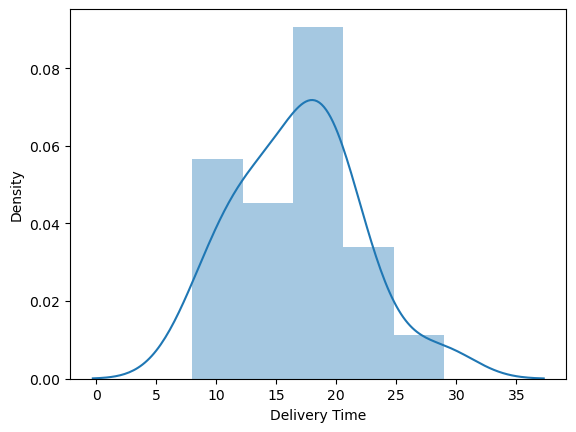

In [24]:
sns.distplot(df['Delivery Time'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_13568\2847030727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'],kde=False)


<Axes: xlabel='Sorting Time'>

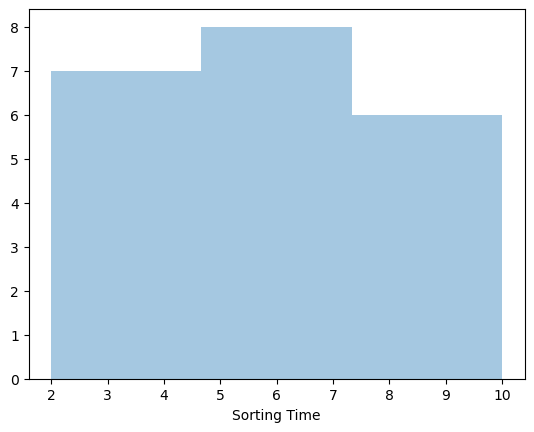

In [25]:
sns.distplot(df['Sorting Time'],kde=False)

# Bivariate Analysis

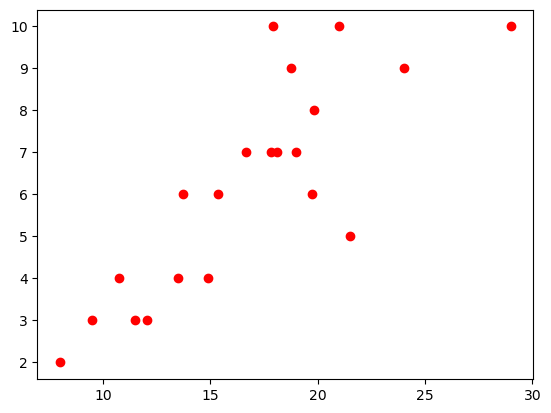

In [26]:
plt.scatter(x=df['Delivery Time'],y=df['Sorting Time'],color='red')

#here data is linear.as the values are if one increases the other increase.It is in positive direction

In [27]:
df['Delivery Time'].cov(df['Sorting Time'])

10.655809523809523

In [28]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [29]:
df.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [30]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

<Axes: >

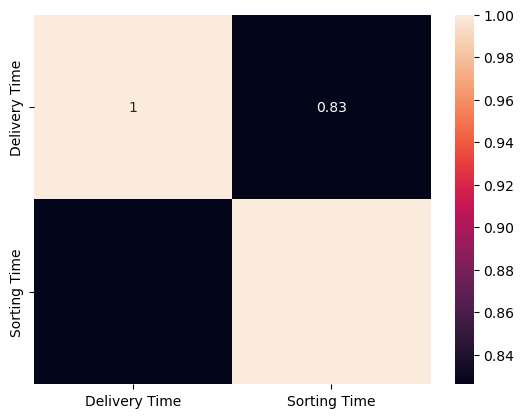

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
import statsmodels.formula.api as smf
df['x']=df['Sorting Time']
df['y']=df['Delivery Time']


In [33]:
model=smf.ols('y~x',data=df).fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.98e-06
Time:                        21:29:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

In [35]:
pred1=model.predict(df['x'])

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


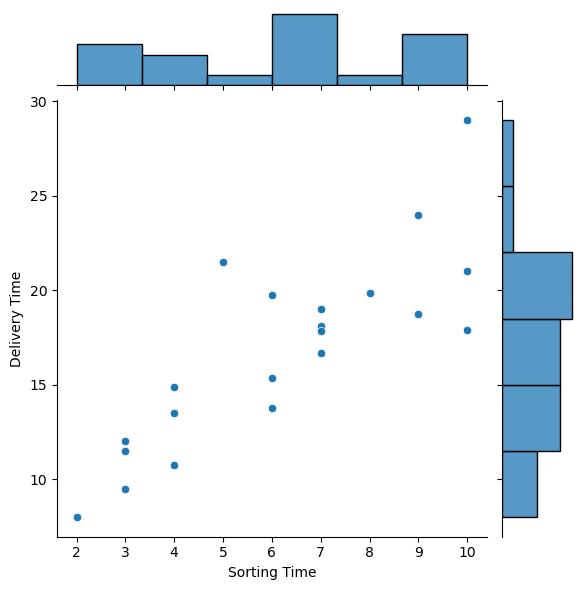

In [36]:
sns.jointplot(df,x='Sorting Time',y='Delivery Time')

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

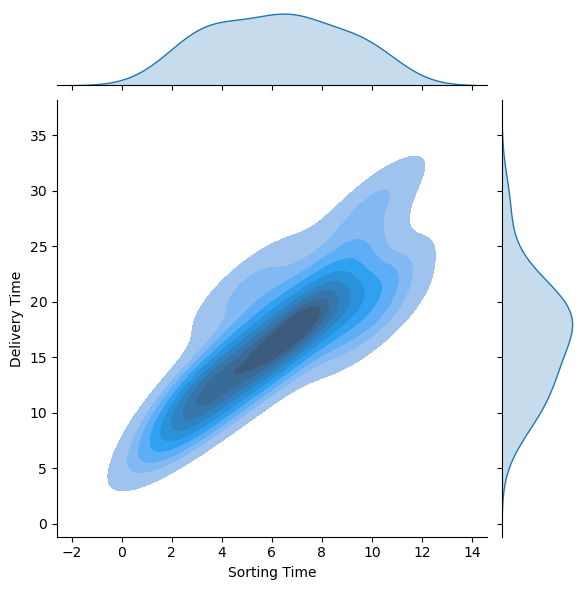

In [37]:
sns.jointplot(df,x='Sorting Time',y='Delivery Time',kind='kde',fill=True)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Density'>

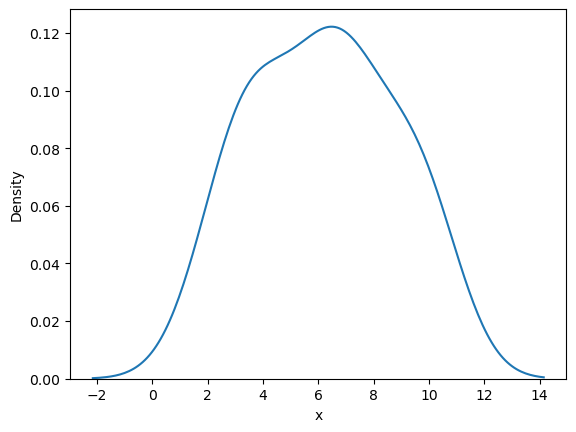

In [38]:
sns.kdeplot(df['x'])

In [39]:

from sklearn.metrics import r2_score 
r2_score(df['y'],pred1)

0.6822714748417231

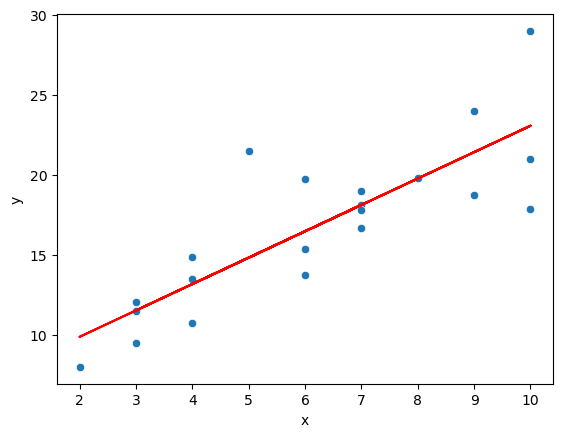

In [40]:
sns.scatterplot(df,x='x',y='y')
plt.plot(df['x'],pred1,color='red')

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(df[['x']],df[['y']])

LinearRegression()

In [42]:
y_pred=lr.predict(df[['x']])
r2_score(df.y,y_pred)

0.6822714748417231